# Ahmad Masood
# 20I-1754
# AI-K
# Lab 04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Task 01

In [2]:
housing_df=pd.read_csv("Housing.csv")
housing_df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


### Statistics

In [3]:
mean_price=housing_df["price"].mean()
median_price=housing_df["price"].median()
std_price=housing_df["price"].std()
print("The mean of price is :",mean_price)
print("The median of price is :",median_price)
print("The Standard Deviation of price is :",std_price)

The mean of price is : 1058779.8678899081
The median of price is : 907584.0
The Standard Deviation of price is : 667148.2157118549


### Frequency table

In [4]:
housing_df["price"].value_counts()

1465896    1
890704     1
269620     1
265248     1
368856     1
          ..
868244     1
932976     1
1092576    1
488064     1
1625268    1
Name: price, Length: 545, dtype: int64

### Charts

<AxesSubplot:xlabel='price', ylabel='Density'>

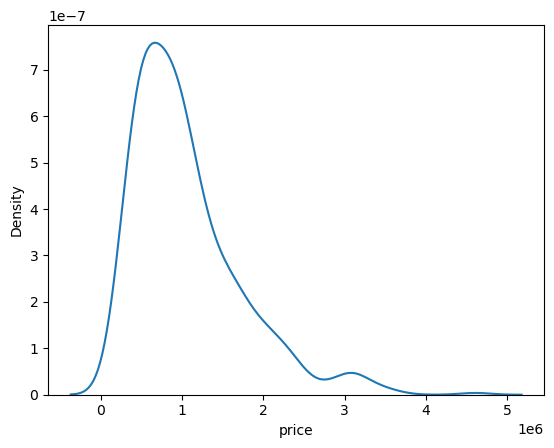

In [5]:
sns.kdeplot(housing_df["price"])

## Task 02

In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
housing_df["mainroad"]=label_encoder.fit_transform(housing_df["mainroad"])
housing_df["guestroom"]=label_encoder.fit_transform(housing_df["guestroom"])
housing_df["basement"]=label_encoder.fit_transform(housing_df["basement"])
housing_df["hotwaterheating"]=label_encoder.fit_transform(housing_df["hotwaterheating"])
housing_df["airconditioning"]=label_encoder.fit_transform(housing_df["airconditioning"])
housing_df["prefarea"]=label_encoder.fit_transform(housing_df["prefarea"])
housing_df["furnishingstatus"]=label_encoder.fit_transform(housing_df["furnishingstatus"])

In [8]:
X=housing_df.iloc[:,:14]
y=housing_df.iloc[:,14:]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0])

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39444444444444443


## Task 03

In [12]:
ss= StandardScaler()

In [13]:
X_new = ss.fit_transform(X)

## Task 04

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [15]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


### So in this case normalization is not putting a significant effect

## Task 05

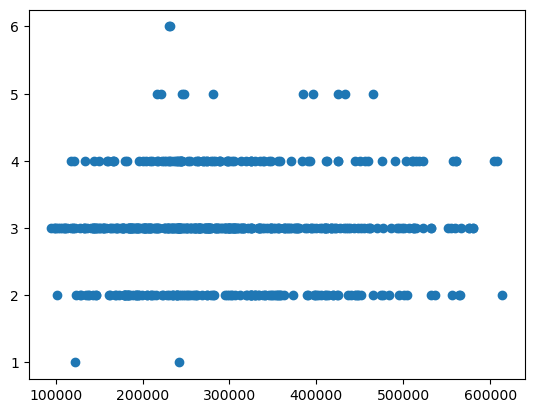

In [30]:
plt.scatter(housing_df["area"], housing_df["bedrooms"])
plt.show()

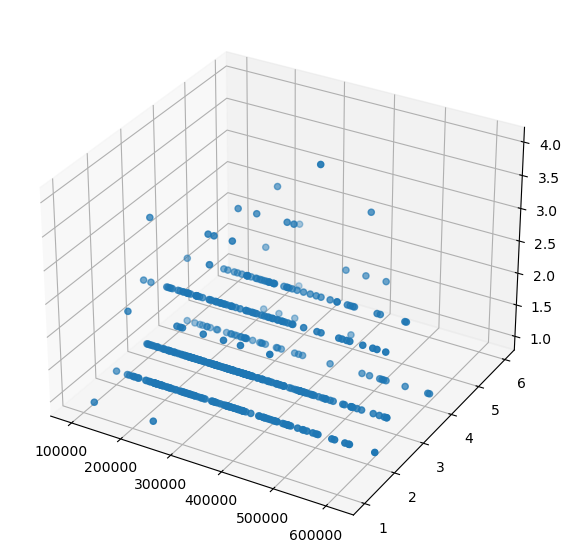

In [31]:
pic = plt.figure(figsize=(7,7))
proj = pic.add_subplot(111, projection='3d')
proj.scatter(housing_df["area"], housing_df["bedrooms"],housing_df["bathrooms"])
plt.show()

## Task 06

In [22]:
# covariance

housing_df_2=pd.DataFrame(ss.fit_transform(housing_df))
housing_df_2.columns=housing_df.columns
housing_df_2.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.001838,0.608944,0.436324,0.407959,0.336380,0.276730,0.741759,0.070169,0.037967,-0.172945,0.014038,0.225293,-0.055353,0.008270,-0.097293
area,0.608944,1.001838,0.697232,0.678671,0.033918,0.042852,-0.000483,-0.058366,-0.003933,-0.051807,0.003438,-0.015291,-0.125201,-0.045061,-0.025256
length,0.436324,0.697232,1.001838,-0.021085,0.071760,0.040611,0.008649,-0.048765,0.027652,-0.019026,-0.052014,0.091522,-0.031255,0.004758,-0.000019
width,0.407959,0.678671,-0.021085,1.001838,-0.000657,0.032208,0.006311,-0.025667,-0.039400,-0.052312,0.050895,-0.090836,-0.133998,-0.075292,-0.035985
bedrooms,0.336380,0.033918,0.071760,-0.000657,1.001838,0.374618,0.409315,-0.012055,0.080697,0.097491,0.046134,0.160898,0.139526,0.079168,-0.123471
bathrooms,0.276730,0.042852,0.040611,0.032208,0.374618,1.001838,0.326764,0.042476,0.126701,0.102293,0.067283,0.187259,0.177822,0.063588,-0.143823
stories,0.741759,-0.000483,0.008649,0.006311,0.409315,0.326764,1.001838,0.121930,0.043618,-0.172711,0.018881,0.294142,0.045631,0.044507,-0.104865
mainroad,0.070169,-0.058366,-0.048765,-0.025667,-0.012055,0.042476,0.121930,1.001838,0.092507,0.044083,-0.011803,0.105617,0.204808,0.200243,-0.157014
guestroom,0.037967,-0.003933,0.027652,-0.039400,0.080697,0.126701,0.043618,0.092507,1.001838,0.372750,-0.010327,0.138433,0.037535,0.161193,-0.118545
basement,-0.172945,-0.051807,-0.019026,-0.052312,0.097491,0.102293,-0.172711,0.044083,0.372750,1.001838,0.004393,0.047428,0.051592,0.228502,-0.113038


In [25]:
#correlation
housing_df_2.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


## Task 07

In [51]:
housing_df["area"].corr(housing_df["length"])

0.6959524284375517

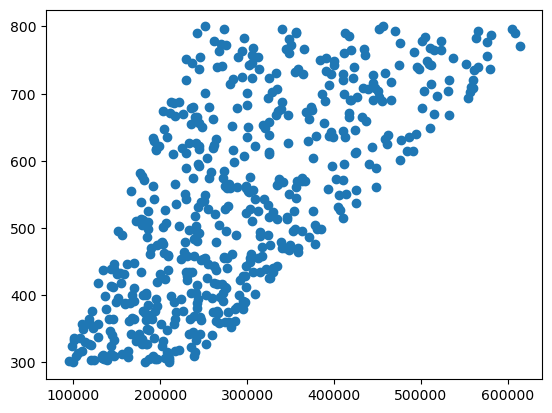

In [53]:
plt.scatter(housing_df["area"], housing_df["length"])

## Task 08

In [7]:
cities=['A','B','C','D','E']
sample=[]
for i in range (len(cities)):
        for j in range(len(cities)):
            for k in range(len(cities)):
                sample.append(cities[i]+cities[j]+cities[k])
sample

['AAA',
 'AAB',
 'AAC',
 'AAD',
 'AAE',
 'ABA',
 'ABB',
 'ABC',
 'ABD',
 'ABE',
 'ACA',
 'ACB',
 'ACC',
 'ACD',
 'ACE',
 'ADA',
 'ADB',
 'ADC',
 'ADD',
 'ADE',
 'AEA',
 'AEB',
 'AEC',
 'AED',
 'AEE',
 'BAA',
 'BAB',
 'BAC',
 'BAD',
 'BAE',
 'BBA',
 'BBB',
 'BBC',
 'BBD',
 'BBE',
 'BCA',
 'BCB',
 'BCC',
 'BCD',
 'BCE',
 'BDA',
 'BDB',
 'BDC',
 'BDD',
 'BDE',
 'BEA',
 'BEB',
 'BEC',
 'BED',
 'BEE',
 'CAA',
 'CAB',
 'CAC',
 'CAD',
 'CAE',
 'CBA',
 'CBB',
 'CBC',
 'CBD',
 'CBE',
 'CCA',
 'CCB',
 'CCC',
 'CCD',
 'CCE',
 'CDA',
 'CDB',
 'CDC',
 'CDD',
 'CDE',
 'CEA',
 'CEB',
 'CEC',
 'CED',
 'CEE',
 'DAA',
 'DAB',
 'DAC',
 'DAD',
 'DAE',
 'DBA',
 'DBB',
 'DBC',
 'DBD',
 'DBE',
 'DCA',
 'DCB',
 'DCC',
 'DCD',
 'DCE',
 'DDA',
 'DDB',
 'DDC',
 'DDD',
 'DDE',
 'DEA',
 'DEB',
 'DEC',
 'DED',
 'DEE',
 'EAA',
 'EAB',
 'EAC',
 'EAD',
 'EAE',
 'EBA',
 'EBB',
 'EBC',
 'EBD',
 'EBE',
 'ECA',
 'ECB',
 'ECC',
 'ECD',
 'ECE',
 'EDA',
 'EDB',
 'EDC',
 'EDD',
 'EDE',
 'EEA',
 'EEB',
 'EEC',
 'EED',
 'EEE']

In [23]:
# sample[0][0]==sample[0][1] or sample[0][1]==sample[0][2]
index_gone=[]
index_not_gone=[]
for i in range(len(sample)):
    if (sample[i][0]==sample[i][1] or sample[i][1]==sample[i][2] or sample[i][0]==sample[i][2]):
        index_gone.append(i)
    elif (sample[i][0]!=sample[i][1] and sample[i][1]!=sample[i][2] and sample[i][0]!=sample[i][2]):
        index_not_gone.append(i)

In [26]:
probability=[len(index_gone)/125,len(index_not_gone)/125]

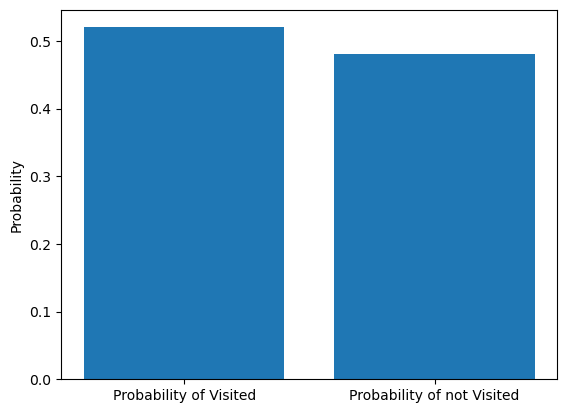

In [29]:
x_label=["Probability of Visited","Probability of not Visited"]
plt.bar(x_label,probability)
plt.ylabel("Probability")
plt.show()

### It is a discrete distribution and multivariate problem